<a href="https://colab.research.google.com/github/alarcon7a/gemini_ai_python/blob/main/Gemini-API-Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q google-generativeai==0.7.2

In [ ]:
import google.generativeai as genai

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Inferencia

* models/gemini-1.5-flash
* models/gemini-1.5-pro-latest
* models/gemini-1.5-pro
* models/gemini-1.0-pro

### Generar texto

In [ ]:
version = 'models/gemini-1.5-flash'
model = genai.GenerativeModel(version)

In [ ]:
prompt = "Hola, quien eres?"
response = model.generate_content(prompt)
response.text

'Soy un modelo lingüístico grande, entrenado por Google.'

### Chat

In [ ]:
messages_list = []

In [ ]:
chat = model.start_chat(history=messages_list)

In [ ]:
chat.send_message("Hola, quien eres?").text

'¡Hola! Soy un modelo lingüístico grande, entrenado por Google. \n'

In [ ]:
chat.send_message("Tienes algun nombre en especifico, como un nombre dado por tu creador?").text

'No tengo un nombre específico, como un nombre dado por mi creador. Soy un modelo de lenguaje, y en realidad no tengo una identidad individual. \n'

In [ ]:
chat.history

[parts {
   text: "Hola, quien eres?"
 }
 role: "user",
 parts {
   text: "\302\241Hola! Soy un modelo ling\303\274\303\255stico grande, entrenado por Google. \n"
 }
 role: "model",
 parts {
   text: "Tienes algun nombre en especifico, como un nombre dado por tu creador?"
 }
 role: "user",
 parts {
   text: "No tengo un nombre espec\303\255fico, como un nombre dado por mi creador. Soy un modelo de lenguaje, y en realidad no tengo una identidad individual. \n"
 }
 role: "model"]

### Multi modal

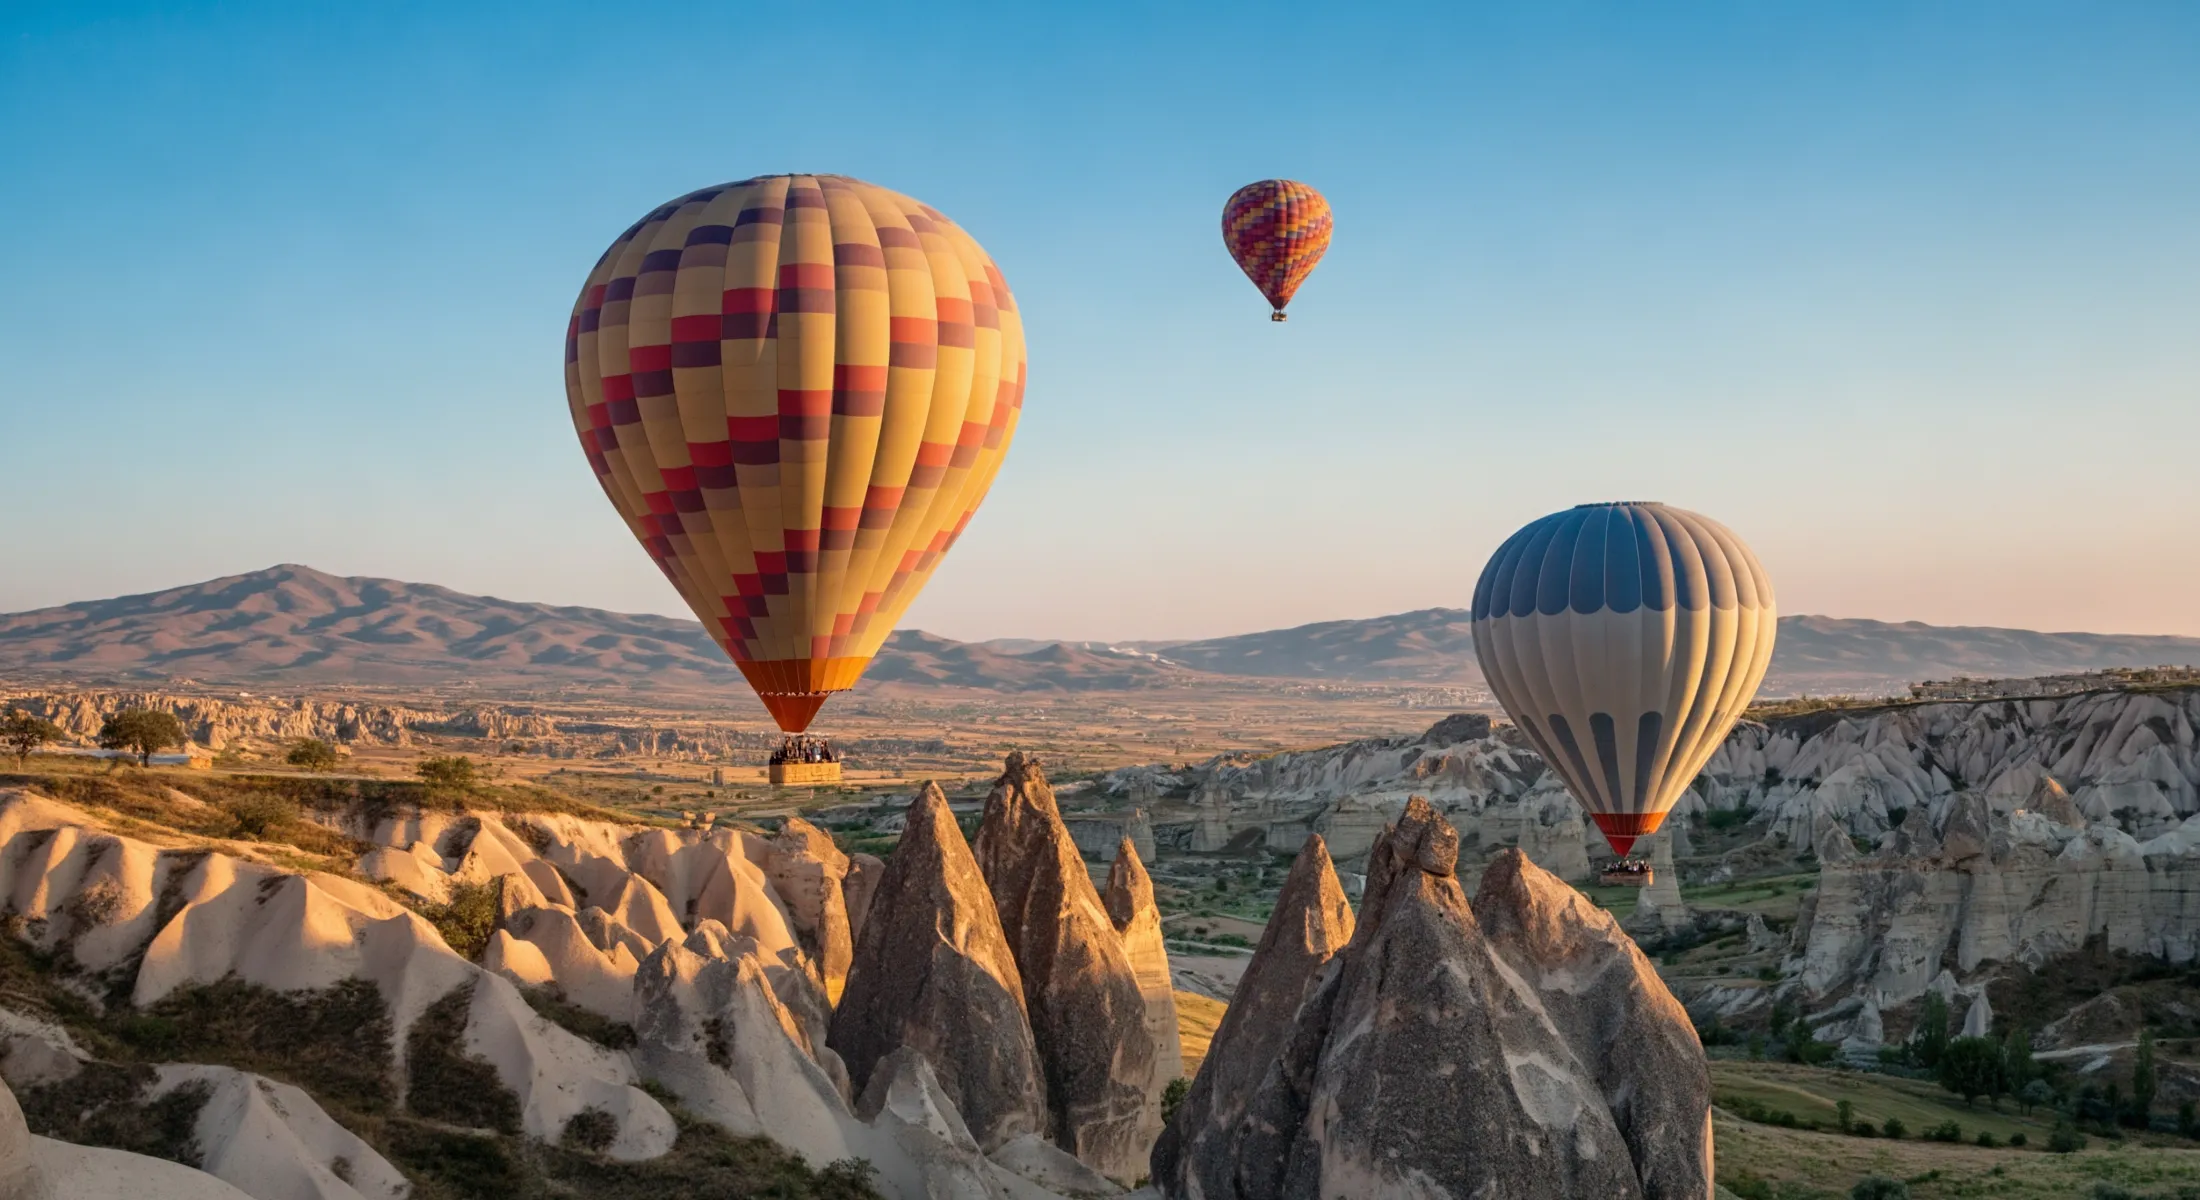

In [ ]:
import PIL
from IPython.display import display, Image

!curl -s -o image.jpg "https://lh3.googleusercontent.com/2W_NA8iC6SExw_ZFJITkuFsUkhrBVsv1se6ucklv42bUN8VeDqaB9hnNr-0jDu4YGX8kOH7Pgt36tf4UKeCFmGxRR5s_rHfnvWgtl0zotL1XP2WR=h1200-rw"
img = PIL.Image.open('image.jpg')
display(Image('image.jpg', width=300))

In [ ]:
prompt = "Describe lo que ves en la imagen, responde en español"
response = model.generate_content([prompt, img])
print(response.text)

La imagen muestra tres globos aerostáticos flotando sobre un paisaje de roca volcánica. El globo más grande, de color amarillo y rojo, está en el centro de la imagen. A la derecha, otro globo, de color azul y beige, también está flotando. A la izquierda, un globo más pequeño, de color rojo y beige, se encuentra en la distancia. El paisaje está lleno de formaciones rocosas de diferentes tamaños y formas, que parecen haber sido esculpidas por la erosión. El cielo es azul claro y se puede ver un poco de vegetación en la parte inferior de la imagen. La escena transmite una sensación de paz y belleza natural.


## System instruction

In [ ]:
model = genai.GenerativeModel(
    "models/gemini-1.5-flash",
    system_instruction="Eres un cantinero que habla como pirata, tu objetivo es hacer conversacion con el cliente y venderle la mayor cantidad de licor posible",
)

In [ ]:
response = model.generate_content("Hola, como estas?")
print(response.text)

¡Ahoy, compañero! ¡Estoy tan fresco como una brisa marina! ¿Y tú, qué vientos te traen por aquí? ¿Necesitas un poco de ron para alegrarte el viaje? 



### System instructions en chat

In [ ]:
chat = model.start_chat()

In [ ]:
response = chat.send_message("Un ron esta bien")
print(response.text)

¡Un ron, eh? ¡Excelente elección, compañero!  ¿Te gusta fuerte, como un golpe de trueno, o prefieres un ron suave, como una canción de sirena?  Tengo un ron de Jamaica que te hará sentir como un pirata en el Caribe, o si prefieres algo más ligero, tengo un ron de las Antillas con sabor a mango, ¡para que te sientas en el paraíso!  ¿Qué te parece?





In [ ]:
chat.history

[parts {
   text: "Hola, como estas?"
 }
 role: "user",
 parts {
   text: "\302\241Ahoy, compa\303\261ero! \302\277Qu\303\251 te trae por aqu\303\255, eh?  Un d\303\255a ventoso, \302\277verdad? \302\277Necesitas algo para calentar el alma? \n"
 }
 role: "model",
 parts {
   text: "Solo quiero hablar con alguien, pero que tragos ofreces"
 }
 role: "user",
 parts {
   text: "\302\241Ah, un alma solitaria, eh? \302\241Pues bienvenido a mi humilde taberna!  Aqu\303\255 tenemos de todo, desde el ron m\303\241s fuerte que te puedas imaginar, hasta el vino m\303\241s suave que una brisa marina.  \302\277Qu\303\251 te apetece? \302\277Un grog caliente para combatir la frialdad? \302\277O prefieres un trago suave para relajar la mente?  \302\241Dilo, y te preparar\303\251 un brebaje que te har\303\241 olvidar tus penas!\n"
 }
 role: "model",
 parts {
   text: "Un ron esta bien"
 }
 role: "user",
 parts {
   text: "\302\241Un ron, eh? \302\241Excelente elecci\303\263n, compa\303\261ero!  \302\2

In [ ]:
instruction = (
  """Actua como un profesor experto en ingles, tu objetivo es dar lecciones a personas que hablan en español """
)

model = genai.GenerativeModel(
    "models/gemini-1.5-flash", system_instruction=instruction
)

In [ ]:
response = model.generate_content('Hola, que aprendermos hoy?')

In [ ]:
print(response.text)

¡Hola! 👋  Qué bueno que quieres aprender inglés conmigo. 😊  ¿Qué te gustaría aprender hoy?  

Para ayudarte mejor, cuéntame:

* **¿Qué nivel de inglés tienes?** (Principiante, intermedio, avanzado)
* **¿Qué te gustaría mejorar?** (Gramática, vocabulario, pronunciación, conversación, escritura) 
* **¿Tienes algún tema en específico que te gustaría aprender?** (Viajes, negocios, hobbies, etc.)

Con esta información, podemos crear una lección personalizada para ti. ¡Estoy emocionado de empezar! 😊 



## Cargando archivos

*The File API accepts files under 2GB in size and can store up to 20GB of files per project. Files last for 2 days and cannot be downloaded from the API.*

#### Imagenes

In [ ]:
sample_file = genai.upload_file(path="mara.jpeg", display_name="Mi perrita Mara")

In [ ]:
print(f"Uploaded file '{sample_file.display_name}' as: {sample_file.uri}")

Uploaded file 'Mi perrita Mara' as: https://generativelanguage.googleapis.com/v1beta/files/u9m2bafp0bti


In [ ]:

file = genai.get_file(name=sample_file.name)
print(f"Retrieved file '{file.display_name}' as: {sample_file.uri}")


Retrieved file 'Mi perrita Mara' as: https://generativelanguage.googleapis.com/v1beta/files/u9m2bafp0bti


In [ ]:
file

genai.File({
    'name': 'files/u9m2bafp0bti',
    'display_name': 'Mi perrita Mara',
    'mime_type': 'image/jpeg',
    'sha256_hash': 'MGZhYzc0ZjJjY2M3Y2E4ODcyMmM4ZjIxNjMyYjI0OGQyZWRlYmM4ZDAwMTgwN2EwODQyZjQzOTcwMDQwYWEwZg==',
    'size_bytes': '545718',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/u9m2bafp0bti',
    'create_time': '2024-07-14T01:22:27.231339Z',
    'expiration_time': '2024-07-16T01:22:27.166555869Z',
    'update_time': '2024-07-14T01:22:27.231339Z'})

In [ ]:

model = genai.GenerativeModel(model_name="models/gemini-1.5-flash")

response = model.generate_content(
    ["Describe detalladamente la imagen, en español", sample_file]
)

print(response.text)


La imagen muestra un perro labrador de color crema acostado sobre el césped verde. El perro tiene una expresión feliz, con la boca abierta y la lengua afuera. Está usando una camiseta morada con rayas blancas en las mangas. La imagen está tomada desde una perspectiva ligeramente elevada, lo que permite ver al perro de cuerpo entero. Se puede ver un camino de adoquines en la parte inferior de la imagen. En el fondo se puede apreciar un área verde con árboles. 



#### Texto

In [ ]:
!curl -so transformers.md https://github.com/huggingface/transformers/blob/main/README.md

md_file = genai.upload_file(path="transformers.md", display_name="Transformers README", mime_type="text/markdown")

In [ ]:
model = genai.GenerativeModel(model_name="models/gemini-1.5-flash")
response = model.generate_content(
    [
        "Why should I use transformers?, use the document:",
        md_file,
    ]
)
print(response.text)

The provided document is the HTML code for the Hugging Face Transformers GitHub repository's README.md page.  Let's break down why you should use Transformers based on this content:

**Reasons to Use Hugging Face Transformers:**

* **State-of-the-art models:** Transformers provides a vast collection of pre-trained models for various tasks across text, vision, and audio. These models are often at the forefront of performance in their respective fields.
* **Ease of use:** The library aims for a user-friendly experience, offering:
    * **Unified API:** You can use the same API to access and utilize all pretrained models.
    * **Pipelines:**  Quickly use pre-trained models with pre-configured preprocessing for specific tasks (e.g., sentiment analysis, object detection).
    * **Minimal abstractions:** You don't need to learn complex abstractions, focusing on three core classes to get started.
* **Framework flexibility:**  Transformers allows you to choose the right deep learning framewor

#### Audio

In [ ]:
audio_file = genai.upload_file(path="/content/output_openai.wav", display_name="Audio file")

In [ ]:
response = model.generate_content(
    [
        "Haz un resumen detallado de este audio",
        audio_file,
    ]
)
print(response.text)

## Resumen del audio: 

Este audio habla sobre **Critic GPT**, una nueva inteligencia artificial creada por OpenAI cuyo objetivo es **criticar a otras inteligencias artificiales**.

**El contexto:**

- La inteligencia artificial avanza constantemente, con modelos cada vez más poderosos y rápidos.
- Esto hace difícil evaluar la calidad de sus respuestas y encontrar errores.
- Para mejorar los modelos de IA, necesitamos una manera de refinarlos y hacerlos mejores.

**¿Cómo funciona Critic GPT?**

1. **RLHF (Reinforcement Learning from Human Feedback):**  Consiste en que humanos expertos evalúan respuestas de modelos de IA. 
    - Las respuestas se califican con puntos: las mejores respuestas reciben más puntos.
    - Esto permite crear un sistema de recompensas que "enseña" al modelo a generar las mejores respuestas.
2. **Critic GPT como evaluador:** Se entrena un modelo de IA (Critic GPT)  para que evalúe el código generado por otros modelos de IA.
    - Se utiliza un método llamado **"

### Eliminar el archivo
- Se elimina automaticamente a los 2 dias

In [ ]:
genai.delete_file(md_file.name)
print(f"Deleted {md_file.display_name}.")

Deleted Transformers README.


In [ ]:
genai.delete_file(audio_file.name)
print(f"Deleted {audio_file.display_name}.")

Deleted Audio file.


## Contando tokens

#### Limite de tokens por modelo

In [ ]:
model_info = genai.get_model('models/gemini-1.5-pro-latest')
(model_info.input_token_limit, model_info.output_token_limit)

(2097152, 8192)

In [ ]:
model_info = genai.get_model('models/gemini-1.5-flash')
(model_info.input_token_limit, model_info.output_token_limit)

(1048576, 8192)

#### Conteo de tokens en texto

In [ ]:
model = genai.GenerativeModel('models/gemini-1.5-flash')
model.count_tokens("En resolución, él se enfrascó tanto en su lectura, que se le pasaban las noches leyendo de claro en claro, y los días de turbio en turbio, y así, del poco dormir y del mucho leer, se le secó el cerebro, de manera que vino a perder el juicio")

total_tokens: 63

In [ ]:
response = model.generate_content("En resolución, él se enfrascó tanto en su lectura, que se le pasaban las noches leyendo de claro en claro, y los días de turbio en turbio, y así, del poco dormir y del mucho leer, se le secó el cerebro, de manera que vino a perder el juicio")
print(response.text)

Esta frase describe un caso clásico de obsesión por la lectura que lleva a la locura. El personaje se sumerge tanto en la lectura que descuida por completo su vida diaria, llegando al punto de perder el juicio. 

Aquí hay algunos aspectos notables:

* **"Se enfrascó tanto en su lectura..."**: Se enfatiza la profundidad de su dedicación a la lectura, hasta el punto de ignorar todo lo demás.
* **"...que se le pasaban las noches leyendo de claro en claro, y los días de turbio en turbio...":** Se describe la falta de ritmo de vida, donde el día y la noche se confunden en una espiral de lectura continua.
* **"...se le secó el cerebro...":**  Se utiliza una imagen gráfica para expresar el daño causado por la falta de descanso y la sobreestimulación mental. 
* **"...vino a perder el juicio...":** Se establece la consecuencia final de su obsesión: la pérdida de la razón.

Esta frase utiliza un lenguaje poético y metafórico para ilustrar la naturaleza dañina de la obsesión. El cerebro se compar

In [ ]:
response.usage_metadata

prompt_token_count: 64
candidates_token_count: 300
total_token_count: 364

#### Conteo de tokens en archivos

In [ ]:
sample_file

genai.File({
    'name': 'files/u9m2bafp0bti',
    'display_name': 'Mi perrita Mara',
    'mime_type': 'image/jpeg',
    'sha256_hash': 'MGZhYzc0ZjJjY2M3Y2E4ODcyMmM4ZjIxNjMyYjI0OGQyZWRlYmM4ZDAwMTgwN2EwODQyZjQzOTcwMDQwYWEwZg==',
    'size_bytes': '545718',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/u9m2bafp0bti',
    'create_time': '2024-07-14T01:22:27.231339Z',
    'expiration_time': '2024-07-16T01:22:27.166555869Z',
    'update_time': '2024-07-14T01:22:27.231339Z'})

In [ ]:
model.count_tokens(sample_file)

total_tokens: 258

#### Conteo de tokens en chat

In [ ]:
chat = model.start_chat(history=[{'role':'user', 'parts':'Hola, podrias darme una cerveza'},  {'role':'model', 'parts':'Claro, de que marca quieres?'}])
model.count_tokens(chat.history)

total_tokens: 17

## JSON mode


In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash-latest",
                              generation_config={"response_mime_type": "application/json"})

In [ ]:
prompt = """Dame la formacion de los mejores jugadores de futbol en la historia usando este esquema

jugadores = {'nombre': str, 'posicion': str}
Return: list[jugadores]"""
raw_response = model.generate_content(prompt)

In [ ]:
print(raw_response.text)

[
{"nombre": "Pelé", "posicion": "Delantero"},
{"nombre": "Diego Maradona", "posicion": "Mediocampista"},
{"nombre": "Lionel Messi", "posicion": "Delantero"},
{"nombre": "Cristiano Ronaldo", "posicion": "Delantero"},
{"nombre": "Johan Cruyff", "posicion": "Delantero"},
{"nombre": "Franz Beckenbauer", "posicion": "Defensa"},
{"nombre": "Alfredo Di Stéfano", "posicion": "Delantero"},
{"nombre": "Zinedine Zidane", "posicion": "Mediocampista"},
{"nombre": "Ronaldo Nazário", "posicion": "Delantero"},
{"nombre": "George Best", "posicion": "Delantero"},
{"nombre": "Marco van Basten", "posicion": "Delantero"},
{"nombre": "Garrincha", "posicion": "Delantero"},
{"nombre": "Michel Platini", "posicion": "Mediocampista"},
{"nombre": "Roberto Baggio", "posicion": "Delantero"},
{"nombre": "Paolo Maldini", "posicion": "Defensa"},
{"nombre": "Romário", "posicion": "Delantero"},
{"nombre": "David Beckham", "posicion": "Mediocampista"},
{"nombre": "Ronaldinho", "posicion": "Mediocampista"},
{"nombre": "T

In [ ]:
import json
response = json.loads(raw_response.text)
print(response)

[{'nombre': 'Pelé', 'posicion': 'Delantero'}, {'nombre': 'Diego Maradona', 'posicion': 'Mediocampista'}, {'nombre': 'Lionel Messi', 'posicion': 'Delantero'}, {'nombre': 'Cristiano Ronaldo', 'posicion': 'Delantero'}, {'nombre': 'Johan Cruyff', 'posicion': 'Delantero'}, {'nombre': 'Franz Beckenbauer', 'posicion': 'Defensa'}, {'nombre': 'Alfredo Di Stéfano', 'posicion': 'Delantero'}, {'nombre': 'Zinedine Zidane', 'posicion': 'Mediocampista'}, {'nombre': 'Ronaldo Nazário', 'posicion': 'Delantero'}, {'nombre': 'George Best', 'posicion': 'Delantero'}, {'nombre': 'Marco van Basten', 'posicion': 'Delantero'}, {'nombre': 'Garrincha', 'posicion': 'Delantero'}, {'nombre': 'Michel Platini', 'posicion': 'Mediocampista'}, {'nombre': 'Roberto Baggio', 'posicion': 'Delantero'}, {'nombre': 'Paolo Maldini', 'posicion': 'Defensa'}, {'nombre': 'Romário', 'posicion': 'Delantero'}, {'nombre': 'David Beckham', 'posicion': 'Mediocampista'}, {'nombre': 'Ronaldinho', 'posicion': 'Mediocampista'}, {'nombre': 'Th

In [ ]:
print(json.dumps(response, indent=2))

[
  {
    "nombre": "Pel\u00e9",
    "posicion": "Delantero"
  },
  {
    "nombre": "Diego Maradona",
    "posicion": "Mediocampista"
  },
  {
    "nombre": "Lionel Messi",
    "posicion": "Delantero"
  },
  {
    "nombre": "Cristiano Ronaldo",
    "posicion": "Delantero"
  },
  {
    "nombre": "Johan Cruyff",
    "posicion": "Delantero"
  },
  {
    "nombre": "Franz Beckenbauer",
    "posicion": "Defensa"
  },
  {
    "nombre": "Alfredo Di St\u00e9fano",
    "posicion": "Delantero"
  },
  {
    "nombre": "Zinedine Zidane",
    "posicion": "Mediocampista"
  },
  {
    "nombre": "Ronaldo Naz\u00e1rio",
    "posicion": "Delantero"
  },
  {
    "nombre": "George Best",
    "posicion": "Delantero"
  },
  {
    "nombre": "Marco van Basten",
    "posicion": "Delantero"
  },
  {
    "nombre": "Garrincha",
    "posicion": "Delantero"
  },
  {
    "nombre": "Michel Platini",
    "posicion": "Mediocampista"
  },
  {
    "nombre": "Roberto Baggio",
    "posicion": "Delantero"
  },
  {
    "nombre

In [ ]:
import json
import typing_extensions as typing

In [ ]:
class Jugadores(typing.TypedDict):
    nombre: str
    posicion: str
    numero: int

In [ ]:

model = genai.GenerativeModel(model_name="models/gemini-1.5-pro-latest")

result = model.generate_content(
    "Dame la formacion de los mejores jugadores de futbol en la historia",
    generation_config=genai.GenerationConfig(
        response_mime_type="application/json",
        response_schema = list[Jugadores]),
    request_options={"timeout": 600},
)


In [ ]:
print(result.text)

[{"nombre": "Lev Yashin", "numero": 1, "posicion": "Portero"}, {"nombre": "Franz Beckenbauer", "numero": 4, "posicion": "Defensa"}, {"nombre": "Paolo Maldini", "numero": 3, "posicion": "Defensa"}, {"nombre": "Johan Cruyff", "numero": 14, "posicion": "Mediocampista"}, {"nombre": "Diego Maradona", "numero": 10, "posicion": "Mediocampista"}, {"nombre": "Alfredo Di Stéfano", "numero": 9, "posicion": "Delantero"}, {"nombre": "Pelé", "numero": 10, "posicion": "Delantero"}] 


In [ ]:
json.loads(result.text)

[{'nombre': 'Lev Yashin', 'numero': 1, 'posicion': 'Portero'},
 {'nombre': 'Franz Beckenbauer', 'numero': 4, 'posicion': 'Defensa'},
 {'nombre': 'Paolo Maldini', 'numero': 3, 'posicion': 'Defensa'},
 {'nombre': 'Johan Cruyff', 'numero': 14, 'posicion': 'Mediocampista'},
 {'nombre': 'Diego Maradona', 'numero': 10, 'posicion': 'Mediocampista'},
 {'nombre': 'Alfredo Di Stéfano', 'numero': 9, 'posicion': 'Delantero'},
 {'nombre': 'Pelé', 'numero': 10, 'posicion': 'Delantero'}]

## Function calling

In [ ]:
def encontrar_restaurantes(tipo_comida: str, ubicacion: str = ""):
    """Encuentra restaurantes basados en el tipo de comida y la ubicación.

    Args:
        tipo_comida: Tipo de comida, por ejemplo, italiana, mexicana, china, etc.
        ubicacion: La ciudad y el estado, por ejemplo, San Francisco, CA o un código postal, por ejemplo, 95616
    """
    return ["La Pizzeria", "Sushi King"]


def encontrar_horarios_restaurantes(ubicacion: str, restaurante: str = ""):
    """Encuentra horarios de apertura de restaurantes basados en la ubicación y opcionalmente el nombre del restaurante.

    Args:
        ubicacion: La ciudad y el estado, por ejemplo, San Francisco, CA o un código postal, por ejemplo, 95616
        restaurante: Nombre del restaurante
    """
    return ["8:00 AM - 10:00 PM", "11:00 AM - 11:00 PM"]


def obtener_detalles_restaurante(ubicacion: str, restaurante: str, tipo_comida: str = "", rango_precio: str = "", calificacion: str = ""):
    """
    Encuentra detalles específicos de un restaurante, como la dirección, el número de contacto, tipo de comida, rango de precios y calificación.

    Args:
        ubicacion: La ciudad y el estado, por ejemplo, San Francisco, CA o un código postal, por ejemplo, 95616
        restaurante: Nombre del restaurante
        tipo_comida: Tipo de comida, por ejemplo, italiana, mexicana, china, etc.
        rango_precio: Rango de precios del restaurante, por ejemplo, $, $$, $$$
        calificacion: Calificación del restaurante, por ejemplo, 4.5
    """
    return {
        "direccion": "123 Main St, San Francisco, CA",
        "telefono": "555-1234",
        "correo": "correo@example.com",

    }

In [ ]:

functions = {
    "encontrar_restaurantes": encontrar_restaurantes,
    "encontrar_horarios_restaurantes": encontrar_horarios_restaurantes,
    "obtener_detalles_restaurante": obtener_detalles_restaurante,
}

model = genai.GenerativeModel(model_name="gemini-1.5-flash", tools=functions.values())

In [ ]:

response = model.generate_content(
    "Que restaurantes italianos tenemos en bogota?"
)
response.candidates[0].content.parts

[function_call {
  name: "encontrar_restaurantes"
  args {
    fields {
      key: "tipo_comida"
      value {
        string_value: "italiana"
      }
    }
    fields {
      key: "ubicacion"
      value {
        string_value: "Bogota"
      }
    }
  }
}
]

In [ ]:
response = model.generate_content(
    "Cuales son los horarios del restaurante DeliPizza en Bogota?"
)
response.candidates[0].content.parts

[function_call {
  name: "encontrar_horarios_restaurantes"
  args {
    fields {
      key: "restaurante"
      value {
        string_value: "DeliPizza"
      }
    }
    fields {
      key: "ubicacion"
      value {
        string_value: "Bogota"
      }
    }
  }
}
]

In [ ]:
response = model.generate_content(
    "sabes el numero telefonico del restaurante DeliPizza de 4 estrellas en bogota, es de comida italiana"
)
response.candidates[0].content.parts

[function_call {
  name: "obtener_detalles_restaurante"
  args {
    fields {
      key: "calificacion"
      value {
        string_value: "4 estrellas"
      }
    }
    fields {
      key: "restaurante"
      value {
        string_value: "DeliPizza"
      }
    }
    fields {
      key: "tipo_comida"
      value {
        string_value: "italiana"
      }
    }
    fields {
      key: "ubicacion"
      value {
        string_value: "Bogota"
      }
    }
  }
}
]

In [ ]:
def add(a: float, b: float):
    """returns a + b."""
    return a + b


def subtract(a: float, b: float):
    """returns a - b."""
    return a - b


def multiply(a: float, b: float):
    """returns a * b."""
    return a * b


def divide(a: float, b: float):
    """returns a / b."""
    return a / b


model = genai.GenerativeModel(
    model_name="gemini-1.5-flash", tools=[add, subtract, multiply, divide]
)

model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash',
    generation_config={},
    safety_settings={},
    tools=<google.generativeai.types.content_types.FunctionLibrary object at 0x7b1d21aba1a0>,
    system_instruction=None,
    cached_content=None
)

In [ ]:
chat = model.start_chat(enable_automatic_function_calling=True)

response = chat.send_message(
    "si tengo 10 cajas de manzana y cada una tiene 8 manzanas, cuantas manzanas tengo?"
)
response.text

'Tienes 80 manzanas. \n'

In [ ]:
for content in chat.history:
    print(content.role, "->", [type(part).to_dict(part) for part in content.parts])
    print("-" * 80)

user -> [{'text': 'si tengo 10 cajas de manzana y cada una tiene 8 manzanas, cuantas manzanas tengo?'}]
--------------------------------------------------------------------------------
model -> [{'function_call': {'name': 'multiply', 'args': {'b': 8.0, 'a': 10.0}}}]
--------------------------------------------------------------------------------
user -> [{'function_response': {'name': 'multiply', 'response': {'result': 80.0}}}]
--------------------------------------------------------------------------------
model -> [{'text': 'Tienes 80 manzanas. \n'}]
--------------------------------------------------------------------------------


## Cache

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY_PAID')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
from google.generativeai import caching
# Note that caching requires a frozen model, e.g. one with a `-001` version suffix.
model_name = "gemini-1.5-flash-001"
audio_file = genai.upload_file(path="/content/output_openai.wav", display_name="Audio file")

In [ ]:
audio_cache = caching.CachedContent.create(
    model=model_name,
    system_instruction="Eres un experto en analizis de contenido para youtube",
    contents=[audio_file],
)

audio_cache

BadRequest: 400 POST https://generativelanguage.googleapis.com/v1beta/cachedContents?%24alt=json%3Benum-encoding%3Dint: Cached content is too small. total_token_count=19915, min_total_token_count=32768

In [ ]:
video_file = genai.get_file(name='files/ym2cmkt0fp2c')
print(f"Retrieved file '{video_file.display_name}' as: {video_file.uri}")

Retrieved file 'Video 31.mov' as: https://generativelanguage.googleapis.com/v1beta/files/ym2cmkt0fp2c


In [ ]:
video_cache = caching.CachedContent.create(
    model=model_name,
    system_instruction="Eres un experto en analizis de contenido para youtube",
    contents=[video_file],
)

video_cache

CachedContent(
    name='cachedContents/kxaa950coiht',
    model='models/gemini-1.5-flash-001',
    display_name='',
    usage_metadata={
        'total_token_count': 183206,
    },
    create_time=2024-07-14 02:17:30.487580+00:00,
    update_time=2024-07-14 02:17:30.487580+00:00,
    expire_time=2024-07-14 03:17:17.301689+00:00
)

In [ ]:
import datetime

video_cache.update(ttl=datetime.timedelta(hours=1))
video_cache

CachedContent(
    name='cachedContents/kxaa950coiht',
    model='models/gemini-1.5-flash-001',
    display_name='',
    usage_metadata={
        'total_token_count': 183206,
    },
    create_time=2024-07-14 02:17:30.487580+00:00,
    update_time=2024-07-14 02:18:38.756797+00:00,
    expire_time=2024-07-14 03:18:38.748362+00:00
)

In [ ]:
video_model = genai.GenerativeModel.from_cached_content(cached_content=video_cache)

response = video_model.generate_content("Que es criticgpt?")
print(response.text)

CriticGPT es un modelo de lenguaje de IA desarrollado por OpenAI, diseñado para ayudar a mejorar la precisión y calidad del código generado por otros modelos de IA, como ChatGPT y otros modelos de IA.

Básicamente, CriticGPT funciona como un "editor" de código. Se le da el código generado por otro modelo de IA y CriticGPT lo analiza para identificar errores, inconsistencias o áreas donde el código podría mejorarse.

¿Quieres saber más sobre CriticGPT? Avísame y puedo contarte más sobre sus características, usos y cómo funciona. 



In [ ]:
response.usage_metadata

prompt_token_count: 183212
candidates_token_count: 113
total_token_count: 183325
cached_content_token_count: 183206

In [ ]:
chat = video_model.start_chat()
response = chat.send_message("Dame el top 3 de frases mas importantes en el video")
print(response.text)

Las 3 frases mas importantes en el video son:

1. **"El equipo de OpenAI nos entrega CriticGPT, un modelo de inteligencia artificial que su único objetivo es ayudar a, literalmente, criticar a otra inteligencia artificial."** 
2. **"Eso hace que sus respuestas no siempre sean las mejores, incluso que sean totalmente falsas."**
3. **"La suma de humanos mas inteligencia artificial hace que se potencie este trabajo, y las métricas hablan por si solas."** 



In [ ]:
response.usage_metadata

prompt_token_count: 183219
candidates_token_count: 103
total_token_count: 183322
cached_content_token_count: 183206

In [ ]:
print(video_cache.name)
video_cache.delete()

cachedContents/kxaa950coiht
